# 알고리즘 구분용 용어
- ensemble : 정형 데이터를 다루는데에 있어서 가장 좋은 알고리즘으로 불린다. 

ensemble에 해당하는 방식들
- bagging 
- boosting

#### ensemble
- 합창, 협주 -> 1인 x, **여럿이서 진행**
- 대부분 Decision Tree 기반으로 만들어짐
- 최종 결과를 도출할 때, n개의 알고리즘 결과값을 이용하는 방법
- ex) 회귀 : n개의 알고리즘 결과값들을 평균
- ex) 분류 : n개의 알고리즘 결과값들을 투표
- 대표적인 알고리즘 : RandomForest, Extra Tree, Gradient Boosting

#### bagging
- bootstrap + aggregation + ing
- bootstrap으로 도출한 여러 개의 결과를 합산
- bootstrap으로 서로 조금씩 다른 데이터 셋 n개 만들고, n개의 데이터셋에 대해 학습을 진행(조금씩 다르게 학습됨)
- -> n개의 학습된 예측결과를 합산

#### boosting ( 점수를 극대화하고 싶다 )
- 이전 모델의 오차를 보완하는 방향으로 만들어진다. -> 정형 데이터 기준으로 가장 정확도가 높은 알고리즘( 잘 사용했을 때 )
- 부스팅 모델의 단점 : 속도가 느리다. 이전 모델에 의존적이다. 내부 계산이 복잡하다
- 대충 사용하면 randomforest보다 성능이 안좋음. -> tuning

### 분류 문제의 평가지표
- 혼동행렬 개념 도입
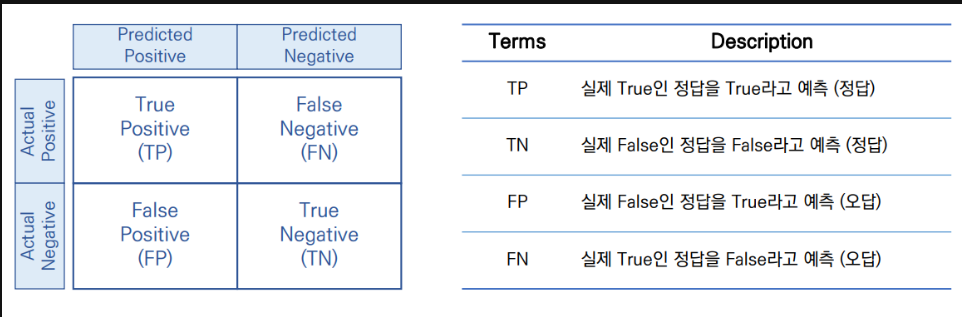

In [1]:
import pandas as pd

df = pd.read_csv("test2_modify")
df.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff'],
      dtype='object')

In [2]:
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
    'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff']

train, test = df[0::2], df[1 :: 2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [3]:
from sklearn.tree import DecisionTreeClassifier as dt

In [4]:
model = dt(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [5]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [6]:
y_test

0        0
1        0
2        1
3        0
4        0
        ..
19793    0
19794    0
19795    0
19796    0
19797    0
Name: IsCanceled, Length: 19798, dtype: int64

In [7]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test
for_plot

,predict,actual
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
19793,0,0
19794,0,0
19795,0,0
19796,0,0


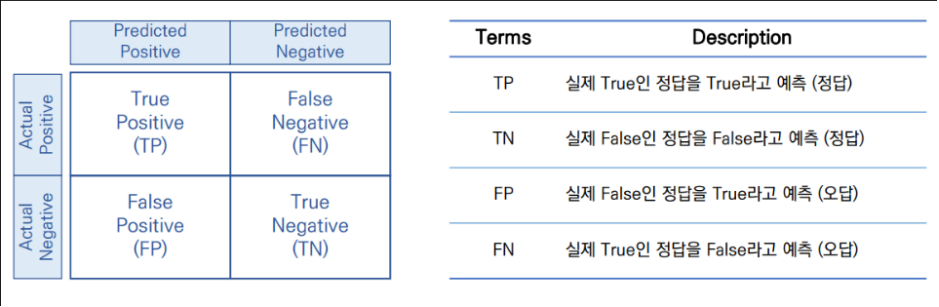
#### accuracy
- 전체 중에 맞춘 비율
- 정확도 = 예측결과와 실제 값이 맞은 건 수 / 전체 데이터 수
- acc = (TP + TN) / (TP + TN + FN + FP)

#### precision
- 모델이 T라고 분류한 것 중에서 실제 T인 것의 비율
- prec = TP / (TP + FP)

#### recall
- 실제 T인 것 중에서 모델이 T라고 예측한 것의 비율
- recall = TP / (TP + FN)
- sensitivity, hit rate
- TPR( True Positive Rate ) 


- precision 과 recall은 바라보는 관점에서 차이가 있다. 



#### precision/ recall 차이점
- 화재경보 ( 불이 난 경우 : 1, 안 난 겨우 : 0 )
- FP  
- FN  
- 경중의 차이가 크다. 

- 스팸메일 분류 ( 스팸메일 : 1, 아닌 경우 : 0 ) 
- FP

- 게임 어뷰저 분류( 어뷰저인 경우 : 1, 아닌 경우 : 0 )
- FP : 어뷰저라고 판단했는데 어뷰저가 아닌데 억울한 사람이 생긴다.
- FN : 어뷰저라고 판단을 안 했는데 어뷰저다. 
- 애매한 부분이 생긴다. 

In [8]:
from sklearn.metrics import confusion_matrix as cm

In [9]:
TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
print(TN, FP, FN, TP)

13424 849 2490 3035


In [10]:
acc = (TP + TN) / (TP + TN + FN + FP)
acc

0.831346600666734

In [11]:
prec = TP / (TP + FP)
prec

0.7814109165808445

In [12]:
recall = TP / (TP + FN)
recall

0.5493212669683258

#### 언제 accuracy 대신 precision과 recall 등이 고려될까?
- class imbalance issue가 발생했을 때 accuracy의 의미가 떨어진다.

#### ROC Curve
- AUC(Area Under Curve)

In [13]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [14]:
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

GradientBoostingClassifier()

In [15]:
m2.predict_proba(X_test)

array([[0.85, 0.15],
       [0.71, 0.29],
       [0.31, 0.69],
       ...,
       [0.98, 0.02],
       [0.87, 0.13],
       [0.77, 0.23]])

In [16]:
m1.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
r1 = pd.DataFrame(m1.predict_proba(X_test), columns = ['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns = ['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns = ['neg', 'pos'])

In [18]:
r3

,neg,pos
0,0.494244,0.505756
1,0.816796,0.183204
2,0.288396,0.711604
3,0.370010,0.629990
4,0.361432,0.638568
...,...,...
19793,0.605018,0.394982
19794,0.605018,0.394982
19795,0.551790,0.448210
19796,0.551790,0.448210


In [19]:
from sklearn.metrics import roc_curve

In [20]:
x1, y1, _ = roc_curve(y_test, r1['pos'])
x2, y2, _ = roc_curve(y_test, r2['pos'])
x3, y3, _ = roc_curve(y_test, r3['pos'])

In [21]:
import matplotlib.pyplot as plt

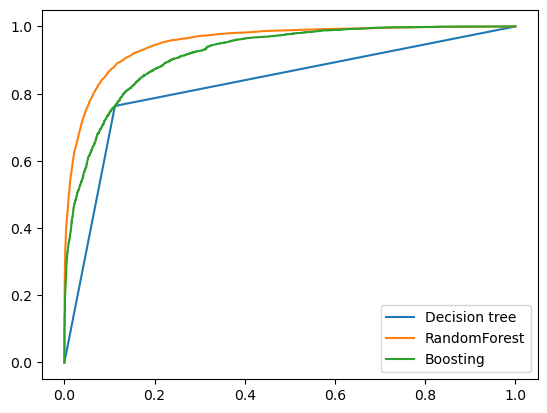

In [22]:
# ROC Curve

plt.plot(x1, y1, label = 'Decision tree')
plt.plot(x2, y2, label = 'RandomForest')
plt.plot(x3, y3, label = 'Boosting')
plt.legend()

# Hyperparameter-Tuning ( 초매개변수를 튜닝한다 )
- 모델을 학습한 후에 튜닝을 진행한다.
- 최적의 옶션값을 찾아서 알고리즘의 성능을 극대화하는 방법

In [23]:
df = pd.read_csv("test2_modify")
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_stay,Local_proposition,Country_Ratio,Country_Simple,car_yes,diff
0,0,342,2015,July,27,1,0,0,2,0,...,0,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,0
2,0,0,2015,July,27,1,0,2,2,0,...,0,0,Check-Out,2015-07-03,1,0,0.445247,PRT,0,0
3,0,9,2015,July,27,1,0,2,2,0,...,0,1,Check-Out,2015-07-03,3,0,0.445247,PRT,0,0
4,1,85,2015,July,27,1,0,3,2,0,...,0,1,Canceled,2015-05-06,1,0,0.445247,PRT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39592,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39593,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39594,0,130,2017,July,28,9,2,0,1,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0


In [24]:
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
    'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff']

train, test = df[0::2], df[1 :: 2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [25]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [26]:
from sklearn.metrics import confusion_matrix as cm

In [27]:
model = rf()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test
for_plot.head()

,predict,actual
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0


In [29]:
TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
recall = TP / (TP + FN)
recall

0.7829864253393665

In [30]:
def score(model):
    # 옵션값이 바뀌면 점수가 바뀐다. -> 점수가 가장 잘 나오는 hyperparameter 튜닝을 해보자.
    # 매개변수를 동시에 바꿔야한다. 하나씩 바꾸는 것이 아니다. 
    model.fit(X_train, y_train)

    for_plot = pd.DataFrame()
    for_plot['predict'] = model.predict(X_test)
    for_plot['actual'] = y_test


    TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
    recall = TP / (TP + FN)
    return recall

In [31]:
model = rf(max_depth = 15, max_features = 0.5)
score(model)

0.7681447963800905

## 접근법 3가지
- Grid-search 
    - 장점 : 세밀할수록 정확한 값을 찾을수 있다.
    - 단점 : 시간이 오래걸린다.
- Random-Search
    - 장점 : 시간을 자신이 직접 정할 수 있다. ( 몇 분이든 자신이 정할 수 있다.)
    - 단점 : 언제 나올지 모른다. 원하는 결과값이
- Optimizer

## Grid Search

In [32]:
md_ls = [3, 5, 7, 9 , 11, 13, 15, 17]
mf_ls = [0.1, 0.3, 0.5, 0.7, 0.9] # 보통 실수형은 0과 1사이에서의 값을 처리한다. 
all_scores = []

for md in md_ls:
    for mf in mf_ls:
        model = rf(max_depth = md, max_features = mf, n_jobs = - 1) # n_jobs = -1는 컴퓨터의 모든 자원을 여기에 우선적으로 투자하라는 매개변수
        all_scores.append({'recall' : score(model), 'md' : md, 'mf' : mf})
hyper_df = pd.DataFrame(all_scores)

In [33]:
hyper_df.sort_values(by = 'recall', ascending = False)

,recall,md,mf
38,0.792941,17,0.7
37,0.788054,17,0.5
39,0.787149,17,0.9
34,0.778462,15,0.9
33,0.775023,15,0.7
36,0.773213,17,0.3
32,0.768326,15,0.5
29,0.755475,13,0.9
28,0.753122,13,0.7
31,0.750226,15,0.3


## Random-Search

In [34]:
import time

target_time = 5
t0 = time.time()

while True:
    t1 = time.time() - t0
    if t1 > target_time:
        break
print('반복끝')

반복끝


In [35]:
from random import randint

randint(1, 999) / 1000

0.753

In [36]:
target_time = 5
t0 = time.time()
all_scores = []

while True:
    t1 = time.time() - t0
    if t1 > target_time:
        break
        
    md = randint(18, 25)
    mf = randint(1,999) / 1000
    model = rf(max_depth = md, max_features = mf, n_jobs = - 1) # n_jobs = -1는 컴퓨터의 모든 자원을 여기에 우선적으로 투자하라는 매개변수
    all_scores.append({'recall' : score(model), 'md' : md, 'mf' : mf})

    
hyper_df = pd.DataFrame(all_scores)
hyper_df.sort_values(by = 'recall', ascending = False)

,recall,md,mf
4,0.800724,21,0.700
0,0.798371,24,0.605
6,0.797104,18,0.952
7,0.797104,21,0.965
5,0.796199,24,0.968
2,0.789502,20,0.360
3,0.733937,25,0.052
1,0.722715,22,0.085
